# CROP YIELD PREDICTION:
The aim of this project is to develop a Machine Learning model which can be used by farmers to predict the yield/ harvest amount from the grown crops based on different features include `Rain Fall (mm)`, `Fertilizer`, `Temperatue`, `Nitrogen (N)`, `Phosphorus (P)`, `Potassium (K)`.
### The dataset used can be found on kaggle website: 

    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid', font_scale=1.4)
sns.set_palette(['#ff826e', 'red'])
sns.set(rc={"axes.facecolor":'#faded9'})
%matplotlib inline

import pickle
import warnings
warnings.filterwarnings('ignore')

# Adjustment settings
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format",lambda x:'%.2f'% x)

## Load the dataset

In [3]:
df = pd.read_excel('crop_yield_data_sheet.xlsx')
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.00,80.00,28,80.00,24.00,20.00,12.00
1,480.00,60.00,36,70.00,20.00,18.00,8.00
2,1250.00,75.00,29,78.00,22.00,19.00,11.00
3,450.00,65.00,35,70.00,19.00,18.00,9.00
4,1200.00,80.00,27,79.00,22.00,19.00,11.00


## Data preprocessing

In [4]:
# Here we check the size of our dataset
df.shape

(109, 7)

In [5]:
# Check the decription of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rain Fall (mm),99.00,849.80,400.04,400.00,450.00,1150.00,1237.50,1300.00
Fertilizer,99.00,67.81,10.03,50.00,60.00,70.00,77.00,80.00
Nitrogen (N),99.00,70.74,6.68,59.00,65.00,71.00,77.00,80.00
Phosphorus (P),99.00,21.13,1.95,18.00,19.50,21.00,23.00,25.00
Potassium (K),99.00,18.06,1.82,15.00,16.00,19.00,19.00,22.00
Yeild (Q/acre),99.00,9.05,1.97,5.50,7.00,9.00,11.00,12.00


In [6]:
# Check various information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [7]:
# Check null values in the dataset
df.isnull().sum()

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64

In [8]:
# Let's rename our features for better interpretation of our dataset
df = df.rename(columns={
    'Rain Fall (mm)': 'Rainfall',
    'Fertilizer': 'Fertilizer',
    'Temperatue': 'Temperature',
    'Nitrogen (N)': 'Nitrogen',
    'Phosphorus (P)': 'Phosphorus',
    'Potassium (K)': 'Potassium',
    'Yeild (Q/acre)': 'Yield'
})
df.head()

,Rainfall,Fertilizer,Temperature,Nitrogen,Phosphorus,Potassium,Yield
0,1230.00,80.00,28,80.00,24.00,20.00,12.00
1,480.00,60.00,36,70.00,20.00,18.00,8.00
2,1250.00,75.00,29,78.00,22.00,19.00,11.00
3,450.00,65.00,35,70.00,19.00,18.00,9.00
4,1200.00,80.00,27,79.00,22.00,19.00,11.00


In [9]:
# To avoid misintepretation of our model we can drop 
# null values for Yield feature and fill the remaining values with some values
df = df.dropna(subset='Yield')
df.shape

(99, 7)

In [25]:
# Lets check if there is any duplicates values
df.duplicated().sum()

4

In [10]:
# We can drop those duplicated values
df = df.drop_duplicates()
df.shape

(95, 7)

In [11]:
# we can check whether our dataset somehow cleaned
df.isnull().sum()

Rainfall       0
Fertilizer     0
Temperature    0
Nitrogen       0
Phosphorus     0
Potassium      0
Yield          0
dtype: int64

In [12]:
# Lets transform the temperature dtypes to float 
df['Temperature'] = df['Temperature'].astype('float')
df.dtypes

Rainfall       float64
Fertilizer     float64
Temperature    float64
Nitrogen       float64
Phosphorus     float64
Potassium      float64
Yield          float64
dtype: object

In [14]:
# Let's split feature and target label
X = df.drop('Yield',axis=1)
y = df['Yield']

In [29]:
# Let's also check whether there are outliers in our dataset
def find_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outlier = df[(df[feature]<lower_bound) | (df[feature]>upper_bound)]
    return outlier

for feature in X.select_dtypes(['int','float']).columns:
    outlier = find_outliers(X,feature)
    print(f"The {feature} has {len(outlier)} potential outliers")

The Rainfall has 0 potential outliers
The Fertilizer has 0 potential outliers
The Temperature has 0 potential outliers
The Nitrogen has 0 potential outliers
The Phosphorus has 0 potential outliers
The Potassium has 0 potential outliers


In this dataset we can see that there is no outliers; which is good for our future model performance.

# Exploratory Data Analysing (EDA)

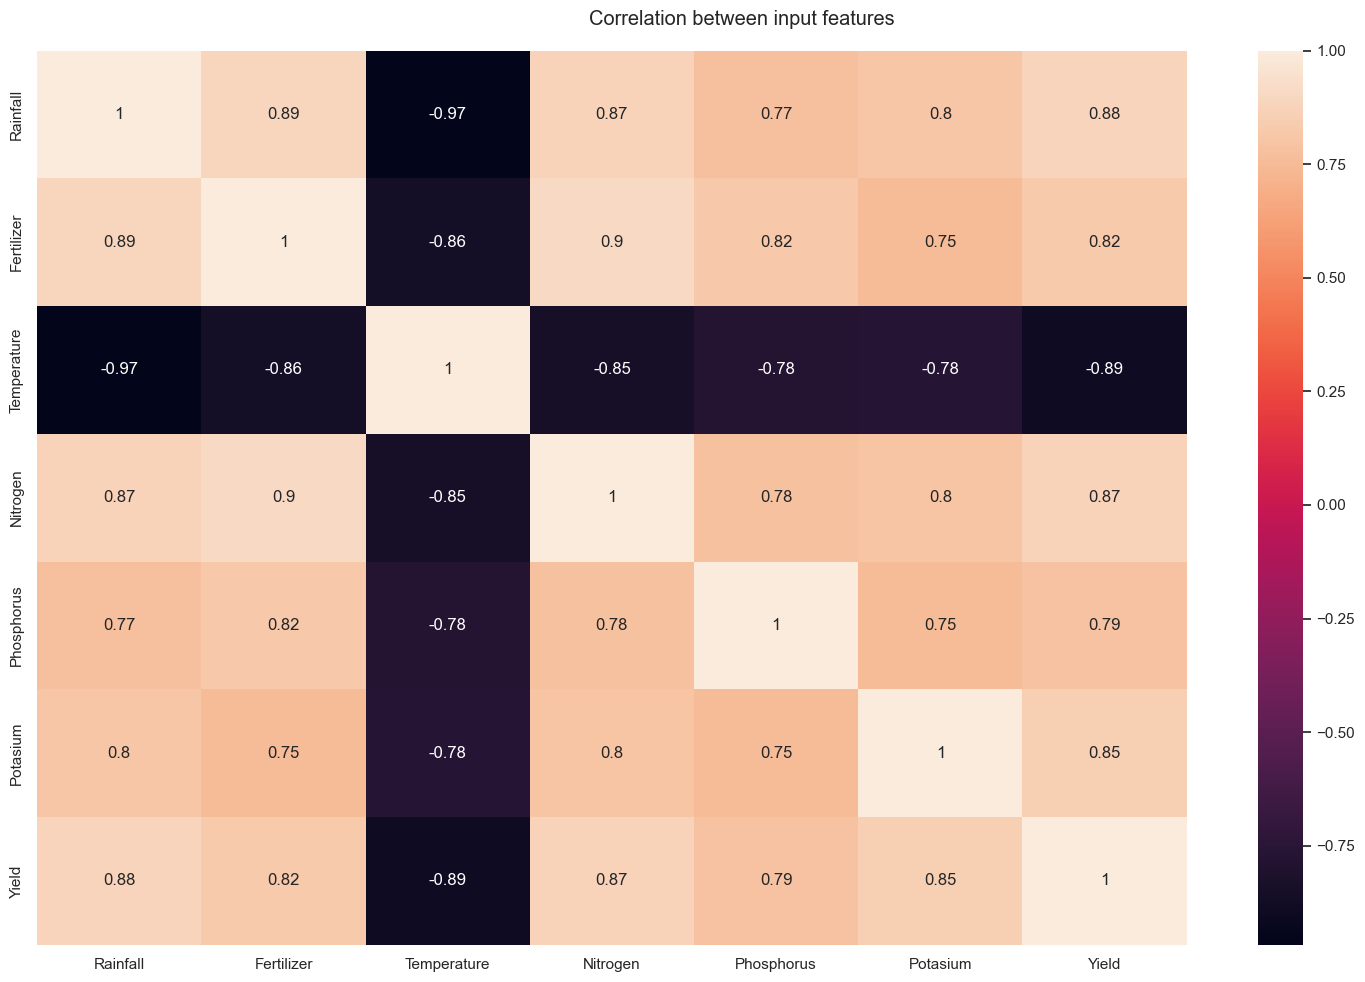

In [17]:
# Let's check the correlation between input features
fig, ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, ax=ax);
fig.suptitle("Correlation between input features")
fig.tight_layout();

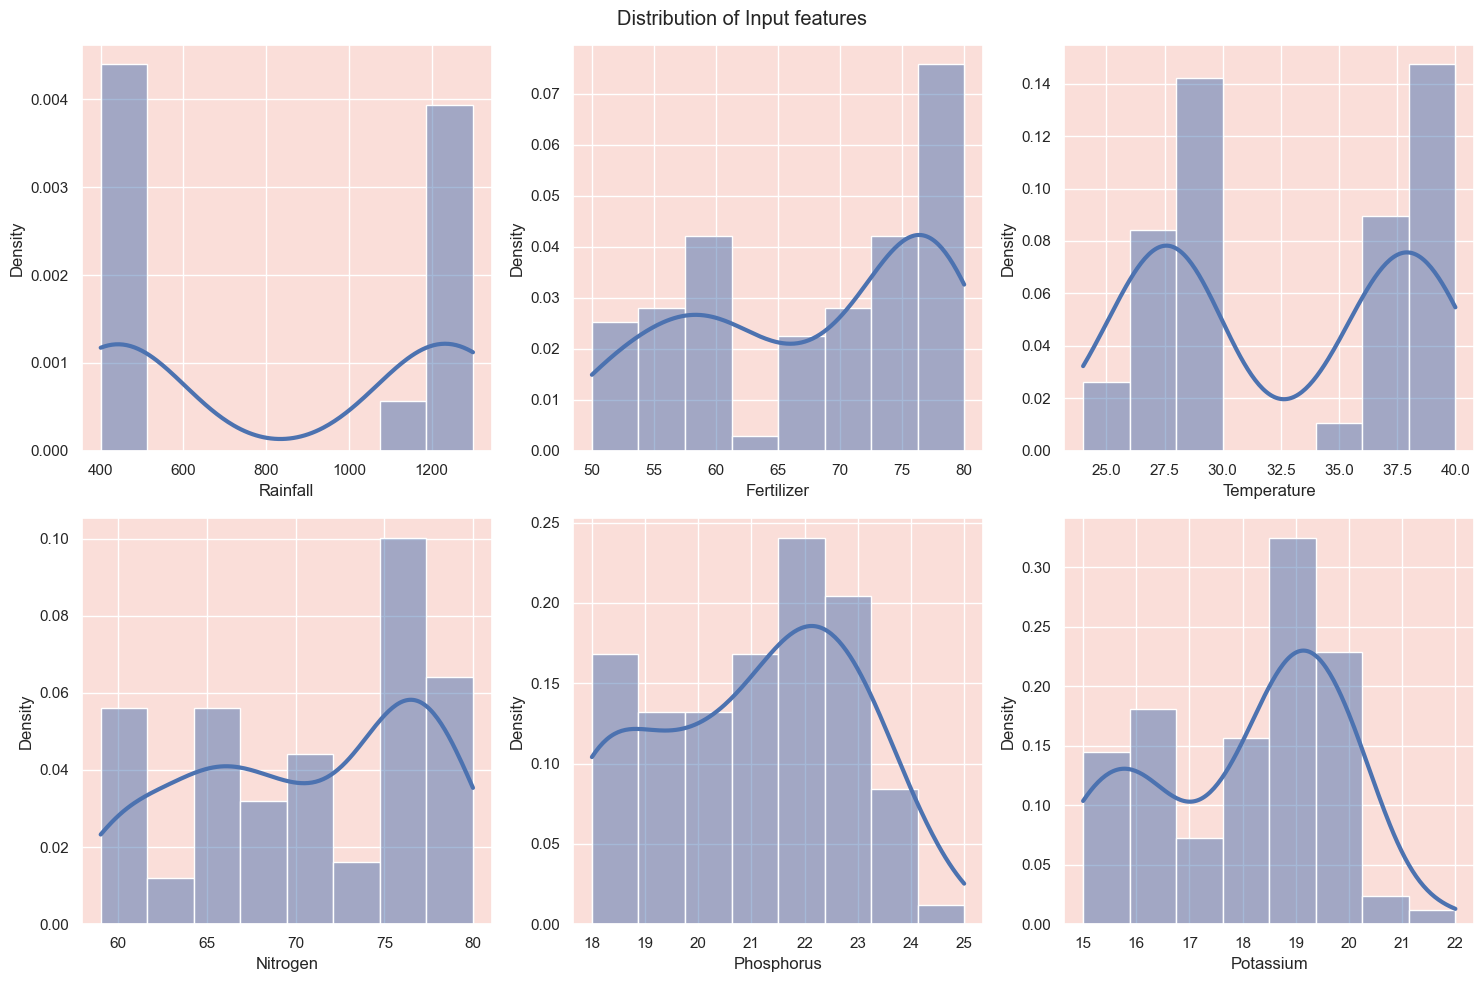

In [30]:
# Check the normal distribution of our data
fig, ax = plt.subplots(2,3,figsize=(15,10))
for i,col in enumerate(X.columns):
    x = i//3
    y = i%3
    sns.histplot(data=X,x=X[col],ax=ax[x,y],stat='density',
                 fill=True,kde=True,line_kws={'lw':3})
fig.suptitle("Distribution of Input features")
fig.tight_layout();

### Training and evaluate a model

In [15]:
# Let's split train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
# Import model evaluation performance metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# define a function to train and test a model
def train_evaluate_model(models,X_train,y_train,X_test,y_test):
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        # Check the overfitting in model performance
        print(f"{model} performance:")
        print(f"The training accuracy: {round(model.score(X_train,y_train),2)}")
        print(f"Test accuracy: {round(model.score(X_test,y_test),2)}")
        print("")
        
        #check mean absolute error
        mse = mean_squared_error(y_test, y_pred)
        print("MSE:", mse)
        print("")

        #evaluate mean square error
        mae = mean_absolute_error(y_test, y_pred)
        print("MAE:", mae)
        print("==================================================")

##### Fitting different models

In [17]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = [ LinearRegression(),
         SVR(),
         RandomForestRegressor()]

# Print the results
train_evaluate_model(models,X_train,y_train,X_test,y_test)


LinearRegression() performance:
The training accuracy: 0.88
Test accuracy: 0.89

MSE: 0.4351525801397442

MAE: 0.5024837603543444
SVR() performance:
The training accuracy: 0.77
Test accuracy: 0.76

MSE: 0.9492055905521583

MAE: 0.8063255761513157
RandomForestRegressor() performance:
The training accuracy: 0.98
Test accuracy: 0.84

MSE: 0.6456157894736843

MAE: 0.646842105263158


### Interpretation
After training 3 models, we found that all are performing well. However we prefer to use the first one `LinearRegression()` because it does't show case the overfitting or underfitting cases.

In [37]:
# Retrain the choosen model
reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [38]:
# Evalute the choosen model
print(f"The training accuracy: {round(reg.score(X_train,y_train),2)}")
print(f"Test accuracy: {round(reg.score(X_test,y_test),2)}")

The training accuracy: 0.88
Test accuracy: 0.89


##### Save model

In [40]:
# Save the model
pickle.dump(reg,open("yield_prediction_model.pkl","wb"))

##### Load saved model

In [41]:
pickle.load(open("yield_prediction_model.pkl","rb"))

# Evalute the loaded model
print(f"The training accuracy: {round(reg.score(X_train,y_train),2)}")
print(f"Test accuracy: {round(reg.score(X_test,y_test),2)}")

The training accuracy: 0.88
Test accuracy: 0.89


## Let's train second selected Model

In [18]:
clf = RandomForestRegressor(random_state=42).fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [19]:
# Evalute the choosen model
print(f"The training accuracy: {round(clf.score(X_train,y_train),2)}")
print(f"Test accuracy: {round(clf.score(X_test,y_test),2)}")

The training accuracy: 0.98
Test accuracy: 0.84


In [21]:
# Save the model
pickle.dump(clf,open("yield_prediction_model.pkl","wb"))

In [22]:
model = pickle.load(open("yield_prediction_model.pkl","rb"))

# Evalute the loaded model
print(f"The training accuracy: {round(model.score(X_train,y_train),2)}")
print(f"Test accuracy: {round(model.score(X_test,y_test),2)}")

The training accuracy: 0.98
Test accuracy: 0.84
